In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Import Data
train = pd.read_csv("../input/train.csv")
test= pd.read_csv("../input/test.csv")
print("Train size:{}\nTest size:{}".format(train.shape, test.shape))

Train size:(42000, 785)
Test size:(28000, 784)


In [3]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [4]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [6]:
import matplotlib.pyplot as plt

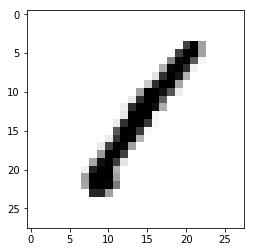

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_test.shape
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape


(42000, 28, 28, 1)

In [9]:
import tensorflow as tf

In [10]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [13]:
x_train=tf.keras.utils.normalize(X_train,axis=1)
x_test= tf.keras.utils.normalize(X_test,axis=1)

In [14]:
model.fit(x_train, y_train,epochs=3)

Epoch 1/3
31500/31500 [==============================] - 4s 118us/sample - loss: 0.3499 - acc: 0.8980
Epoch 2/3
31500/31500 [==============================] - 3s 89us/sample - loss: 0.1409 - acc: 0.9560
Epoch 3/3
31500/31500 [==============================] - 3s 87us/sample - loss: 0.0944 - acc: 0.9691


In [15]:
loss,accuracy=model.evaluate(X_val,y_val)
print(loss,accuracy)

10500/10500 [==============================] - 0s 39us/sample - loss: 0.8505 - acc: 0.9470
0.8505212027565187 0.9469524


In [16]:
model.save('first_model.model')

new_model_1 = tf.keras.models.load_model('first_model.model')

In [17]:
predictions=new_model_1.predict(X_test)

print(predictions)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


0


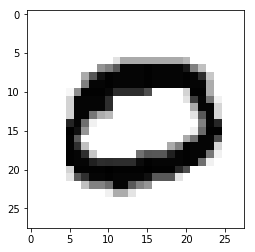

In [18]:
import numpy as np
print(np.argmax(predictions[1]))
plt.imshow(X_test[1],cmap=plt.cm.binary)
plt.show()

In [19]:
results = np.argmax(predictions,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission_final.csv",index=False)